In [2]:
# importando as bibliotecas
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt
import statistics as sts

In [3]:
# carregando a base de dados
base = pd.read_csv('dados.csv', sep=';')
# visualizando os 5 primeiros valores
base.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


In [7]:
# visualizando os 5 ultimos valores
base.tail()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58
186,60,GUARANI DAS MISSOES,24363.31,172.13


In [8]:
# Tamanho da minha base
base.shape

(187, 4)

In [9]:
# informações da minha base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CODIGO        187 non-null    int64  
 1   MUNICIPIO     187 non-null    object 
 2   PIB           187 non-null    float64
 3   VALOREMPENHO  187 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.0+ KB


In [10]:
# verificar os valores nulos (NAN)
base.isnull().sum()

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

In [11]:
# Verificar valores extatísticos
base.describe()

,CODIGO,PIB,VALOREMPENHO
count,187.000000,187.000000,1.870000e+02
mean,247.155080,19808.741337,1.299844e+05
std,138.750385,16984.223244,1.615491e+05
min,1.000000,8236.630000,1.721300e+02
25%,141.000000,13621.455000,5.251718e+04
50%,242.000000,17206.190000,8.422816e+04
75%,372.500000,21429.165000,1.538961e+05
max,496.000000,223848.220000,1.442760e+06


In [12]:
# verificar número de valores únicos
base.nunique()

CODIGO          172
MUNICIPIO       177
PIB             177
VALOREMPENHO    172
dtype: int64

In [37]:
# verificar se há dados iguais
base[base.duplicated('VALOREMPENHO',keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


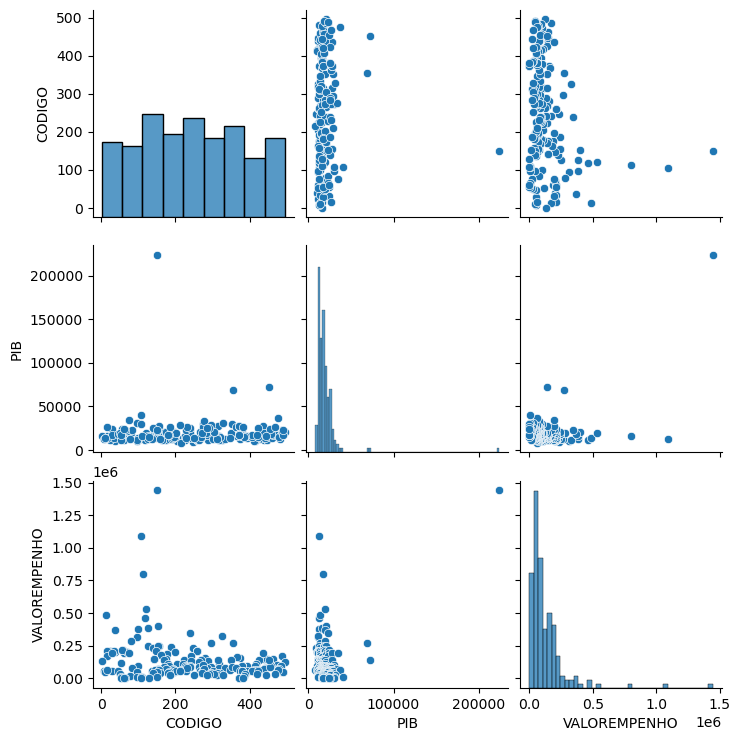

In [14]:
# Visualizar os possíveis gráficos
srn.pairplot(base)

In [19]:
# matriz de correlação entre as vareáveis
base1 = base.iloc[:,[2,3]]
base1.corr()

,PIB,VALOREMPENHO
PIB,1.000000,0.484487
VALOREMPENHO,0.484487,1.000000


In [21]:
# analisando os dados numéricos(dados estatísticos e gráficos)
base['PIB'].describe()

count       187.000000
mean      19808.741337
std       16984.223244
min        8236.630000
25%       13621.455000
50%       17206.190000
75%       21429.165000
max      223848.220000
Name: PIB, dtype: float64

<Axes: xlabel='PIB', ylabel='Count'>

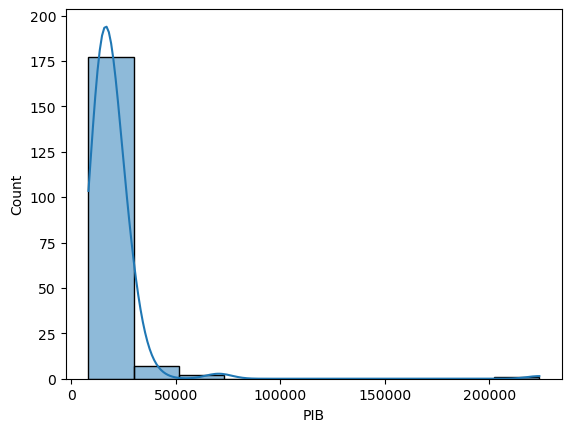

In [32]:
srn.histplot(base['PIB'], kde=True, bins=10)

<Axes: >

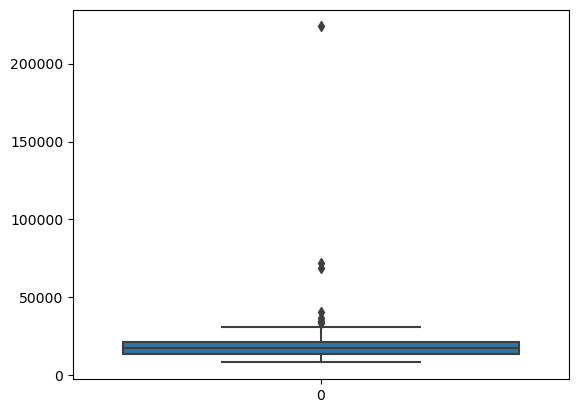

In [24]:
srn.boxplot(base['PIB'])

In [28]:
# Analisando dados numéricos(estatísticos e gráficos)
base['VALOREMPENHO'].describe()

count    1.870000e+02
mean     1.299844e+05
std      1.615491e+05
min      1.721300e+02
25%      5.251718e+04
50%      8.422816e+04
75%      1.538961e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64

<Axes: xlabel='VALOREMPENHO', ylabel='Count'>

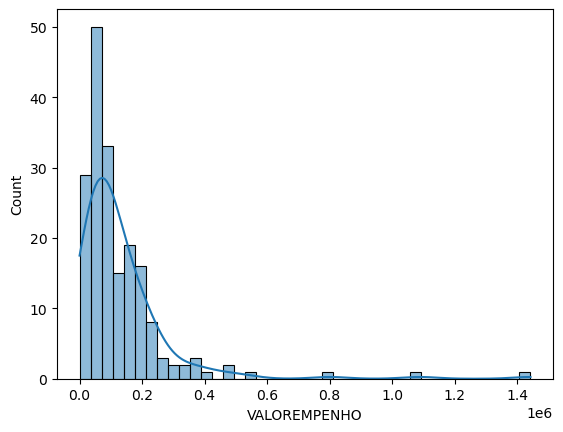

In [31]:
srn.histplot(base['VALOREMPENHO'], kde=True)

<Axes: >

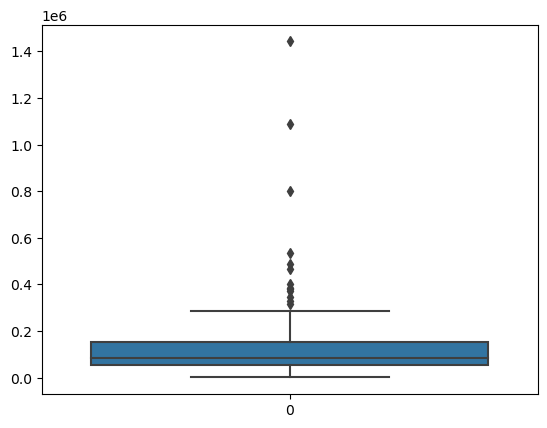

In [30]:
srn.boxplot(base['VALOREMPENHO'])

In [38]:
# Tratamento dos dados
# PIB
base['PIB'].describe()

count       187.000000
mean      19808.741337
std       16984.223244
min        8236.630000
25%       13621.455000
50%       17206.190000
75%       21429.165000
max      223848.220000
Name: PIB, dtype: float64

In [39]:
# tratamento dos outliers, considerando 2 desvios padrões
desv = sts.stdev(base['PIB'])
desv

16984.223244281002

In [40]:
# verificando se alguns valores atende esse critério
base.loc[base['PIB'] >= 2 * desv]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,223848.22,1442759.82
68,75,MARAU,34568.53,193840.83
91,356,GARRUCHOS,68672.25,271841.26
146,453,MUITOS CAPOES,72353.72,140597.55
155,476,CAPAO DO CIPO,36739.78,60851.00
176,108,SANTA CRUZ DO SUL,40671.53,9637.00


In [41]:
# substituindo pela mediana calculada
mediana = sts.median(base['PIB'])
mediana

17206.19

In [42]:
# substituindo pela mediana
base.loc[base['PIB'] >= 2 * desv, 'PIB'] = mediana
# Verificando se mais algun valor satisfaz o critério
base.loc[base['PIB'] >= 2 * desv]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


In [44]:
base['PIB'].describe()

count      187.000000
mean     17810.790053
std       5301.628829
min       8236.630000
25%      13621.455000
50%      17206.190000
75%      20626.775000
max      33730.130000
Name: PIB, dtype: float64

In [43]:
# Tratamento dos dados 
# VALOREMPENHO
base['VALOREMPENHO'].describe()

count    1.870000e+02
mean     1.299844e+05
std      1.615491e+05
min      1.721300e+02
25%      5.251718e+04
50%      8.422816e+04
75%      1.538961e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64

In [45]:
desv = sts.stdev(base['VALOREMPENHO'])
desv

161549.1402272475

In [46]:
base.loc[base['VALOREMPENHO'] >= 2 * desv]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
5,98,QUARAI,12552.51,381286.24
7,325,TUNAS,11543.02,326884.60
8,126,SAO LUIZ GONZAGA,15887.14,385185.68
9,153,URUGUAIANA,21084.19,401124.62
10,36,DOM PEDRITO,19013.71,371857.25


In [47]:
mediana = sts.median(base['VALOREMPENHO'])
mediana

84228.16

In [49]:
base.loc[base['VALOREMPENHO'] >= 2 * desv, 'VALOREMPENHO'] = mediana
base.loc[base['VALOREMPENHO'] >= 2 * desv]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


In [55]:
base['VALOREMPENHO'].describe()

count       187.000000
mean      97788.513422
std       67379.891899
min         172.130000
25%       52517.175000
50%       84228.160000
75%      141109.475000
max      315884.500000
Name: VALOREMPENHO, dtype: float64

<Axes: >

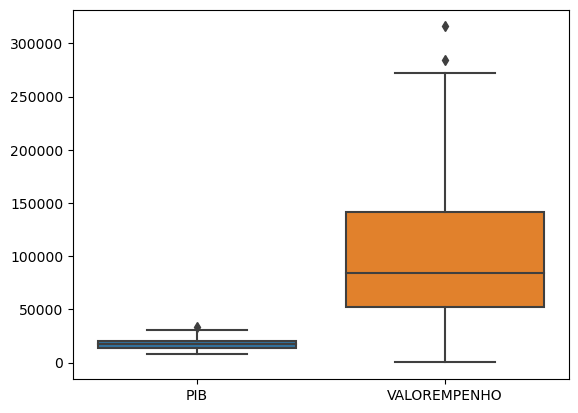

In [54]:
# gráfico valorempenho e pib
base2 = base.iloc[:,[2,3]]
srn.boxplot(base2)

In [59]:
# verificar valores duplicados
base[base.duplicated(['MUNICIPIO'],keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


In [61]:
# excluimos pelo valor 'MUNICIPIO'
base.drop_duplicates(subset='MUNICIPIO', keep='first', inplace=True)
base[base.duplicated(['MUNICIPIO'], keep=False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO


In [62]:
base.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 186
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CODIGO        177 non-null    int64  
 1   MUNICIPIO     177 non-null    object 
 2   PIB           177 non-null    float64
 3   VALOREMPENHO  177 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.9+ KB


In [66]:
base.shape

(177, 4)

In [63]:
base.describe()

,CODIGO,PIB,VALOREMPENHO
count,177.000000,177.000000,177.000000
mean,243.830508,17656.693672,97514.067288
std,140.116164,5271.856647,67132.084749
min,1.000000,8236.630000,172.130000
25%,139.000000,13614.740000,52500.440000
50%,238.000000,16817.210000,83870.170000
75%,372.000000,20448.380000,140597.550000
max,496.000000,33730.130000,315884.500000


In [65]:
base1 = base.iloc[:,[2,3]]
base1.corr()

,PIB,VALOREMPENHO
PIB,1.000000,-0.230526
VALOREMPENHO,-0.230526,1.000000


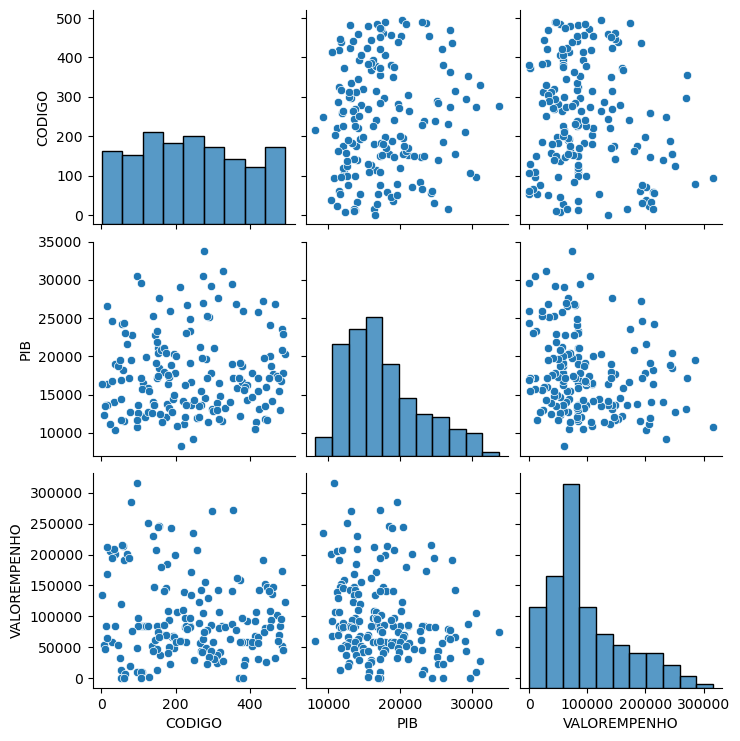

In [76]:
srn.pairplot(base)

<Axes: xlabel='PIB', ylabel='VALOREMPENHO'>

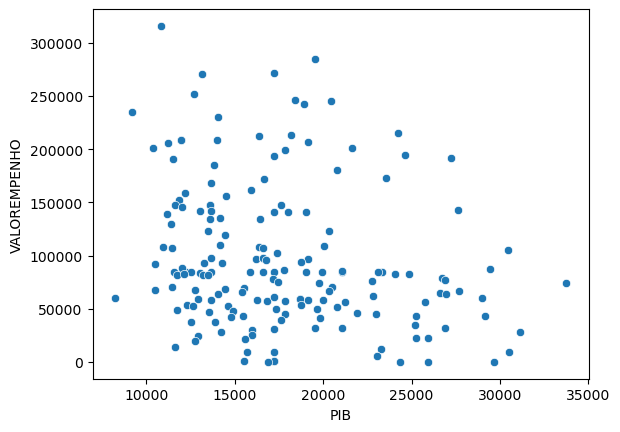

In [67]:
srn.scatterplot(x = base['PIB'], y=base['VALOREMPENHO'])

<Axes: xlabel='MUNICIPIO'>

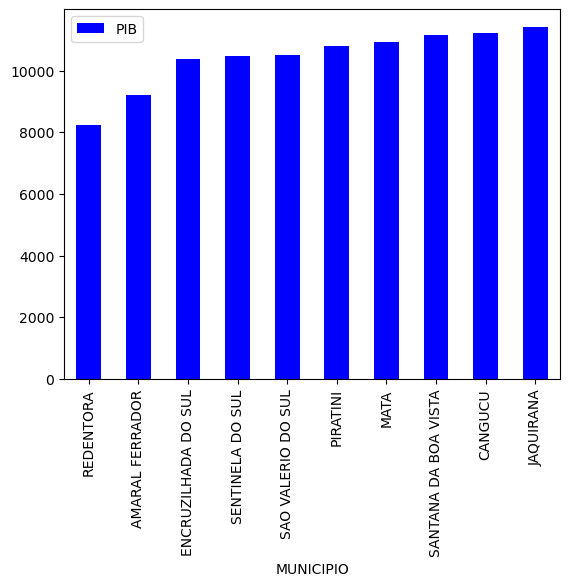

In [70]:
base3 = base.sort_values('PIB').head(10)
base3 = base3.iloc[:,1:3]
base3.plot.bar(x='MUNICIPIO', y='PIB', color = 'blue')

<Axes: xlabel='MUNICIPIO'>

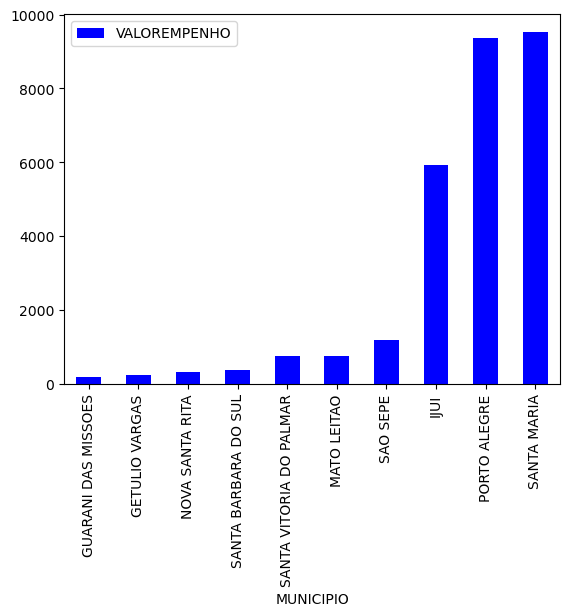

In [74]:
base3 = base.sort_values('VALOREMPENHO').head(10)
base3 = base3.iloc[:,[1,3]]
base3.plot.bar(x='MUNICIPIO', y='VALOREMPENHO', color='blue')